# Aplicación S&P500 y Naftrac


### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik}
$$

Caso dos activos $(a,b)$:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$

$$\sigma^2_p \neq w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 $$





### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right]  $$


Caso dos activos $(a,b)$:
$$E[r_b] = w_1 \mu_r1 + w_2 \mu_r2 $$



***Nota: para este caso, no tenemos probabilidades asignadas por evento. La probabilidad de cada evento es entonces $\frac{1}{n}$***


Si queremos sacar el $w$ que minimiza la varianza de un portafolio:
$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$



In [ ]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'
St = yf.download(tickers, start=start_date)['Close']


[*********************100%%**********************]  2 of 2 completed


In [ ]:
# Obten los rendimientos
rt = St.pct_change()

### Recordando

Si tenemos rendimientos diarios y los queremos convertir anual:
$$E[r_{anual}] = E[r_i] * 252 $$

Para el caso de la volatilidad, tenemos que multiplicar por raíz de 252
$$\sigma[r_{anual}] = \sigma_{ri} * \sqrt{252} $$



In [ ]:
# Obten rendimientos anuales
df = pd.DataFrame()
df['rendimiento'] = rt.mean() * 252
df['volatilidad'] = rt.std() * np.sqrt(252)

In [ ]:
df.iloc[0]

rendimiento    0.045111
volatilidad    0.155676
Name: NAFTRAC.MX, dtype: float64

Text(0.1819440572251937, 0.11438257640923273, 'USA')

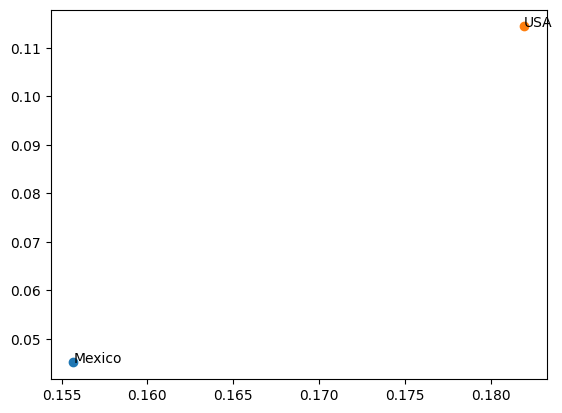

In [ ]:
# Grafique los portafolios
plt.scatter(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'])
plt.text(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'], 'Mexico')
plt.scatter(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'])
plt.text(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'], 'USA')

# ¿Cómo se verá un portafolio con diversos pesos en México y estados unidos? crea 100 portafolios


In [ ]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
# Pesos
w_mx = np.linspace(0, 1, 100)
w_us = 1 - w_mx

# Valores esperados individuales
ve_mx = rt["NAFTRAC.MX"].mean()
ve_us = rt["VOO"].mean()

# Varianzas individuales
var_mx = rt["NAFTRAC.MX"].var()
var_us = rt["VOO"].var()

# Volatilidades individuales
vol_mx = rt["NAFTRAC.MX"].std()
vol_us = rt["VOO"].std()

# Covarianza
cov_mx_us = rt.cov()["VOO"]["NAFTRAC.MX"]

portafolios = pd.DataFrame({
    "w_mx": w_mx,
    "w_us": w_us,
    "rendimiento": w_mx * ve_mx + w_us * ve_us,
    "varianza": w_mx**2 * var_mx + w_us**2 * var_us + 2 * w_mx * w_us * cov_mx_us
})
portafolios["rendimiento_anual"] = portafolios["rendimiento"] * 252
portafolios["volatilidad_anual"] = (portafolios["varianza"])**(1/2) * 252**(1/2)
portafolios


,w_mx,w_us,rendimiento,varianza,rendimiento_anual,volatilidad_anual
0,0.000000,1.000000,0.000454,0.000131,0.114383,0.181944
1,0.010101,0.989899,0.000451,0.000130,0.113683,0.180908
2,0.020202,0.979798,0.000448,0.000128,0.112983,0.179882
3,0.030303,0.969697,0.000446,0.000127,0.112283,0.178866
4,0.040404,0.959596,0.000443,0.000126,0.111584,0.177861
...,...,...,...,...,...,...
95,0.959596,0.040404,0.000190,0.000093,0.047910,0.153241
96,0.969697,0.030303,0.000187,0.000094,0.047210,0.153825
97,0.979798,0.020202,0.000185,0.000095,0.046510,0.154426
98,0.989899,0.010101,0.000182,0.000095,0.045811,0.155043


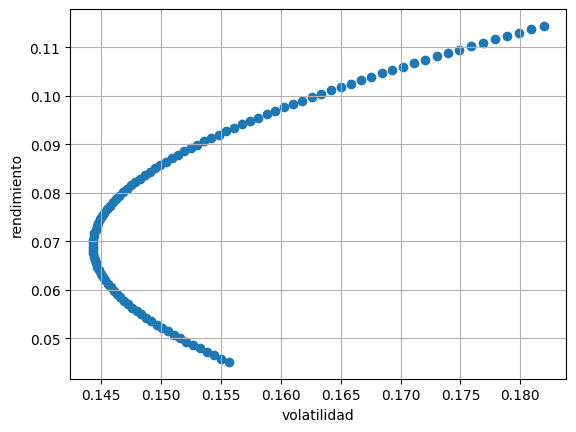

In [ ]:
# Grafica los rendimientos
plt.scatter(portafolios["volatilidad_anual"], portafolios["rendimiento_anual"])
plt.xlabel("volatilidad")
plt.ylabel("rendimiento")
plt.grid()

In [ ]:
portafolio_varianza_minima = portafolios[portafolios.volatilidad_anual == portafolios.volatilidad_anual.min()]

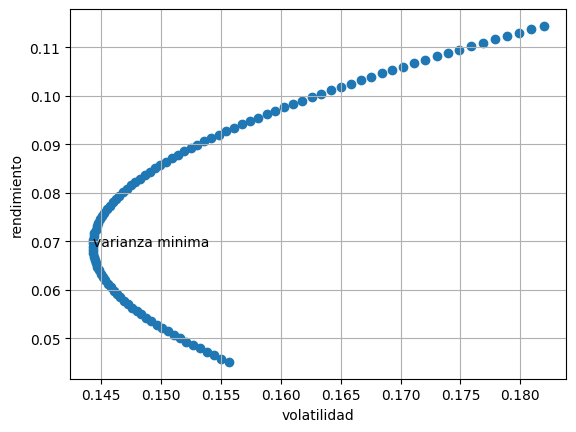

In [ ]:
# ¿Cuál es el portafoio con varianza mínima?
plt.scatter(portafolios["volatilidad_anual"], portafolios["rendimiento_anual"])
plt.text(portafolio_varianza_minima["volatilidad_anual"], portafolio_varianza_minima["rendimiento_anual"], "varianza minima")
plt.xlabel("volatilidad")
plt.ylabel("rendimiento")
plt.grid()

# Varianza mínima de forma anaítica

En este casi, $w$ será el peso que le demos a USA

$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$


In [ ]:
portafolio_varianza_minima

,w_mx,w_us,rendimiento,varianza,rendimiento_anual,volatilidad_anual
65,0.656566,0.343434,0.000273,0.000083,0.068901,0.144298


In [ ]:
w_varianza_minima = (var_us - cov_mx_us) / (var_mx + var_us - 2 * cov_mx_us)
w_varianza_minima

0.6548009629904906

In [ ]:
# ¿Cual es esta varianza?


In [ ]:
# Grafique los portafolios



# Haciendolo de forma matricial

### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} = w^T \Sigma w
$$


### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right] = w^T E[r],$$



In [ ]:
a = np.random.rand(4)
a / np.sum(a)

array([0.14691966, 0.19035961, 0.32090436, 0.34181637])

In [ ]:
# Crear lista de pesos
def random_list(n_act):
    lista = np.random.rand(n_act)
    return lista / np.sum(lista)

w1 = random_list(2)
w1

array([0.41877662, 0.58122338])

$$E[p] = W^T \mu $$
(que es lo mismo que el producto punto)

In [ ]:
# Calcula el rendimiento esperado de un portafolio con estos pesos
mu = rt.mean() * 252

In [ ]:
# Calcula el redimiento matricial
w1.dot(mu)

0.08537328495035768

$$\sigma^2 = W * \Sigma * W^t $$

(Python interpreta las matrices al revés)

In [ ]:
# Calcula la volatilidad de un portafolio con los pesos previos
sigma = rt.cov()
varianza = w1.dot(sigma).dot(w1)
vol = varianza**(1/2) * 252**(1/2)
vol

0.14972455032796386

In [ ]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(rt):
    # Definimos valores esperados y volatilidates
    sigma = rt.cov()
    means = rt.mean()

    # Obtenemos pesos usando la función previa
    n_act = len(rt.keys())
    w = random_list(n_act)

    # Rendimiento esperado matricial y se hace de forma anual
    rendimiento_esperado = w.dot(means)

    # Varianza varianza matricial y se hace de forma anual
    varianza = w.dot(sigma).dot(w)
    volatilidad = varianza**(1/2)

    # Retorna rendimiento, volatilidad y pesos
    return rendimiento_esperado, volatilidad, w

In [ ]:
random_portafolio(rt)

(0.00028932689927710603, 0.009109537842772561, array([0.59869049, 0.40130951]))

In [ ]:
# Simula 100 portafolios, anualizalos
rend = []
vol = []
pesos = []

for i in range(100):
    rendimiento_i, volatilidad_i, w_i = random_portafolio(rt)
    rend.append(rendimiento_i)
    vol.append(volatilidad_i)
    pesos.append(w_i)

df = pd.DataFrame({
    "rendimientos": rend,
    "volatilidades": vol,
    "pesos": pesos
})

df["rendimientos_anual"] = df["rendimientos"] * 252
df["volatilidades_anual"] = df["volatilidades"] * 252**(1/2)

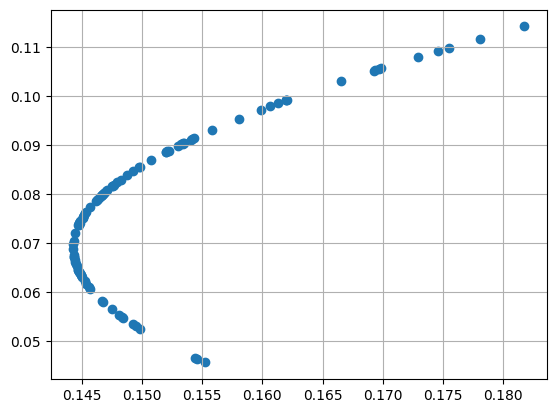

In [ ]:
# Grafica
plt.scatter(df["volatilidades_anual"], df["rendimientos_anual"])
plt.grid()

## La forma matricial nos ayuda a hacerlo cuando hacemos el calculo para varios activos

¿Cómo se ve con 3 activos o más?


In [ ]:
# Parametros para la función
tickers = ['VOO', 'VEA', 'VNQ', 'VWO']
start_date = '2015-01-01'

St = yf.download(tickers, start=start_date)['Close']

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Obtenga los rendimientos
rt = St.pct_change()

In [ ]:
# Simula un portafolio
random_portafolio(rt)

(0.00018949700804047218,
 0.010897271072246627,
 array([0.43223205, 0.271728  , 0.1670307 , 0.12900925]))

In [ ]:
# Simula 100 portafolios, anualizalos
rend = []
vol = []
pesos = []

for i in range(5000):
    rendimiento_i, volatilidad_i, w_i = random_portafolio(rt)
    rend.append(rendimiento_i)
    vol.append(volatilidad_i)
    pesos.append(w_i)

df = pd.DataFrame({
    "rendimientos": rend,
    "volatilidades": vol,
    "pesos": pesos
})

df["rendimientos_anual"] = df["rendimientos"] * 252
df["volatilidades_anual"] = df["volatilidades"] * 252**(1/2)

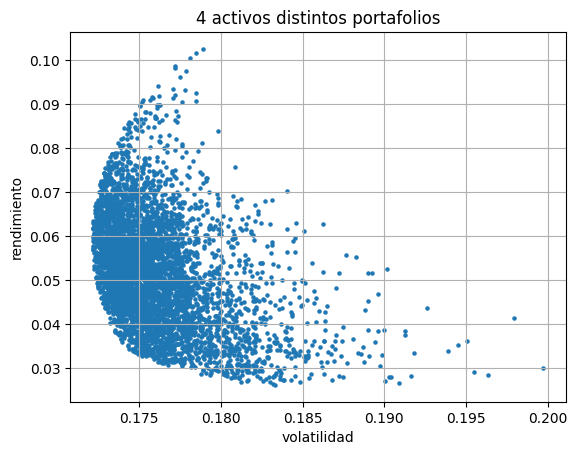

In [ ]:
# Grafique los portafolios
plt.scatter(df["volatilidades_anual"], df["rendimientos_anual"], s=5)
plt.xlabel("volatilidad")
plt.ylabel("rendimiento")
plt.title("4 activos distintos portafolios")
plt.grid()

In [ ]:
# Obtenga el de minima varianza
min_variance = df[df.volatilidades_anual == df.volatilidades_anual.min()]
min_variance["pesos"].values

array([array([0.4672372 , 0.17563373, 0.26660864, 0.09052044])],
      dtype=object)

In [ ]:
# Grafica todo


# ¿Qué pasa si no necesariamente quiero la mínima varianza?

- Quiero tener un rendimiento de 7% con el menor riesgo posible, no estoy interesado si ese es el de varianza mínima

In [ ]:
df_7 = df[df.rendimientos_anual >= 0.07]

portafolio_deseado = df_7[df_7.volatilidades_anual == df_7.volatilidades_anual.min()]
portafolio_deseado.pesos.values

array([array([0.47652933, 0.0849021 , 0.41024078, 0.02832779])],
      dtype=object)